# Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=data.iloc[:,2:4].values
y=data.iloc[:,4].values

# Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()

In [6]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Build Model

In [7]:
from sklearn.svm import SVC
svc_model=SVC(kernel="rbf",gamma=15,C=1)

In [8]:
svc_model.fit(x_train,y_train)

SVC(C=1, gamma=15)

In [9]:
y_pred_train=svc_model.predict(x_train)
y_pred=svc_model.predict(x_test)

In [10]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [11]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

# Evaluate Model Peformance

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.9375, 0.9375)

In [19]:
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 1, 27]], dtype=int64)

In [14]:
confusion_matrix(y_train,y_pred_train)

array([[193,  12],
       [  8, 107]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



# Plot Decision Region

In [15]:
from mlxtend.plotting import plot_decision_regions

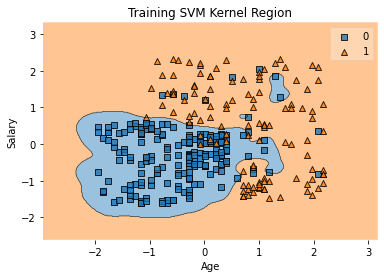

In [16]:
plot_decision_regions(x_train,y_train,clf=svc_model)
plt.title("Training SVM Kernel Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

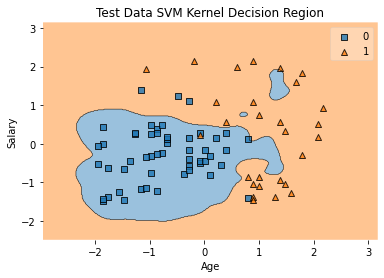

In [17]:
plot_decision_regions(x_test,y_test,clf=svc_model)
plt.title("Test Data SVM Kernel Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()